In [4]:
FILEPATH = "data/task_data/2021-11-07.json"
import json

with open(FILEPATH) as json_file:
    data = json.load(json_file)

In [44]:
display(data['tasks']['habits'][0])
for key in ['up', 'down', 'counterUp', 'counterDown', 'type', 'notes', 'value']:
    print(f"{key}\t:{habit_data[key]}")

{'challenge': {},
 'group': {'approval': {'required': False,
   'approved': False,
   'requested': False},
  'assignedUsers': [],
  'sharedCompletion': 'singleCompletion'},
 'up': True,
 'down': True,
 'counterUp': 0,
 'counterDown': 0,
 'frequency': 'daily',
 'history': [{'date': 1573430709384,
   'value': 4.255940168063077e-07,
   'scoredUp': 1,
   'scoredDown': 1},
  {'date': 1573497000791,
   'value': -1.0266568739064281,
   'scoredUp': 0,
   'scoredDown': 1},
  {'date': 1573609282765,
   'value': -2.0814425471405746,
   'scoredUp': 0,
   'scoredDown': 1},
  {'date': 1573664949504,
   'value': -1.026656333652977,
   'scoredUp': 1,
   'scoredDown': 0},
  {'date': 1573961421861,
   'value': 1.424121033988257e-06,
   'scoredUp': 1,
   'scoredDown': 0},
  {'date': 1574044312627,
   'value': 1.0000013876271532,
   'scoredUp': 1,
   'scoredDown': 0},
  {'date': 1574372576425,
   'value': 1.8497149733009977e-06,
   'scoredUp': 0,
   'scoredDown': 1},
  {'date': 1574624357115,
   'value': 

NameError: name 'habit_data' is not defined

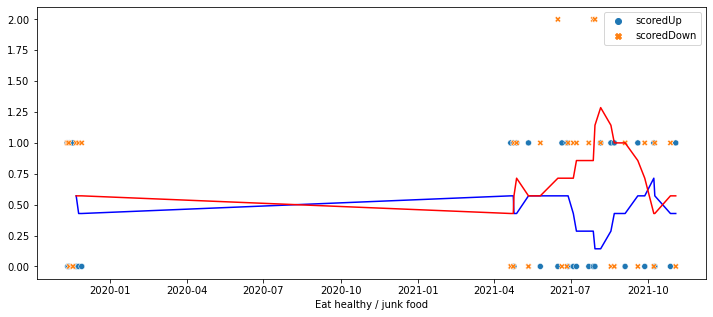

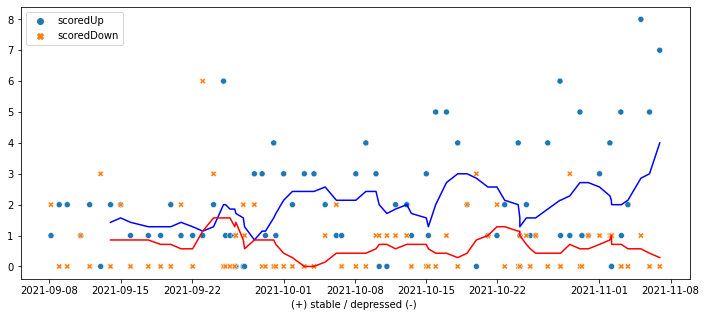

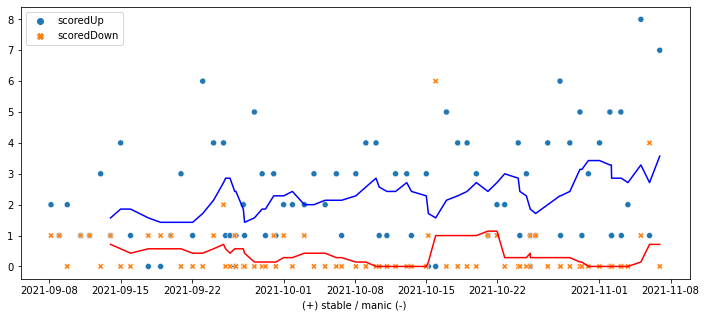

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127809 missing from current font.
  font.set_text(s, 0, flags=flags)


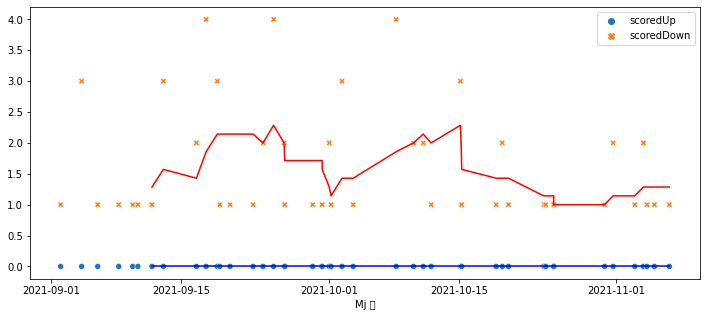

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127866 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127866 missing from current font.
  font.set_text(s, 0, flags=flags)


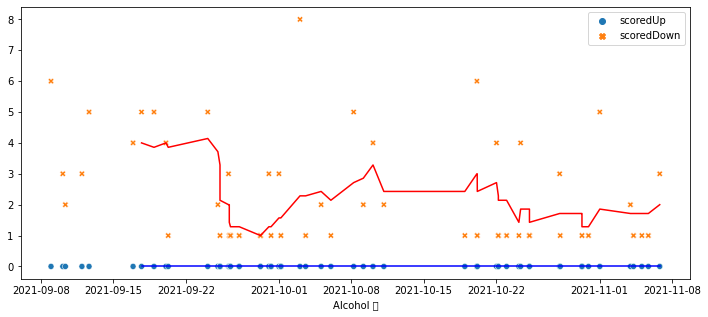

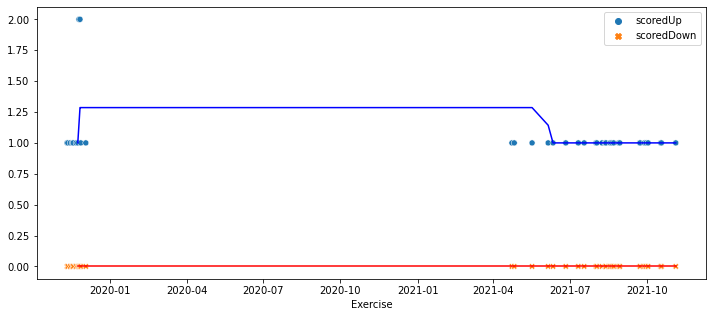

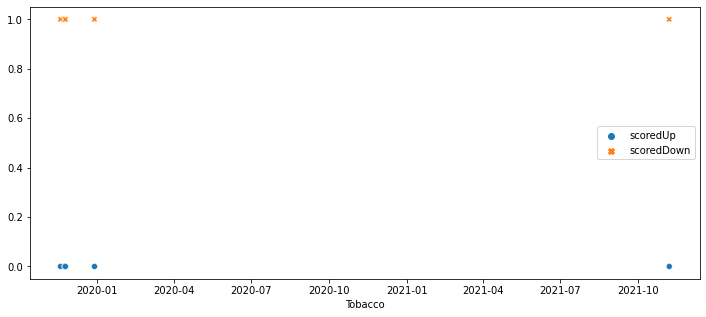

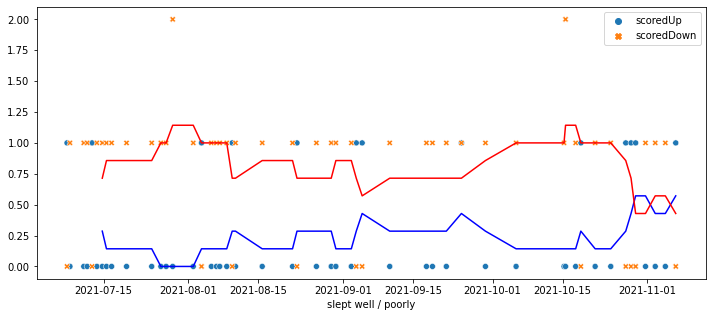

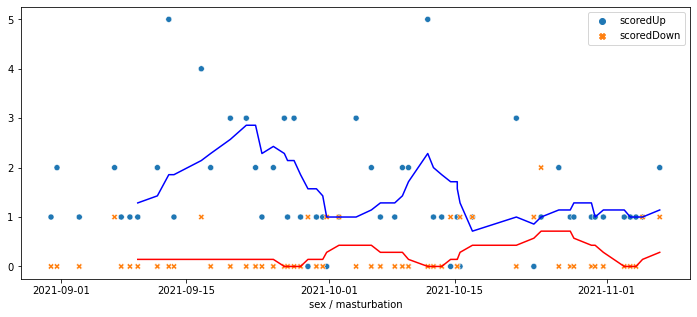

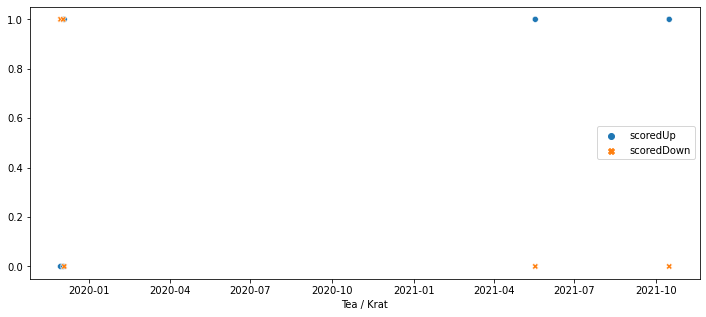

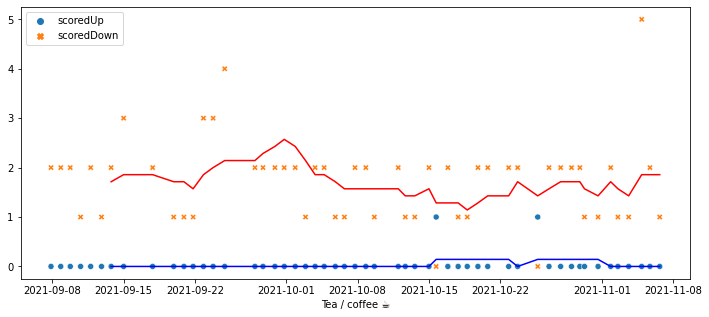

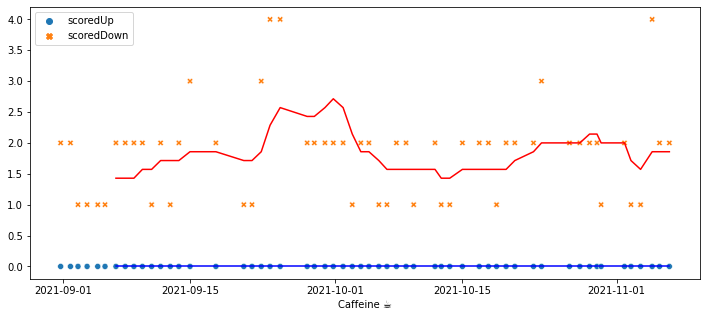

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0, flags=flags)


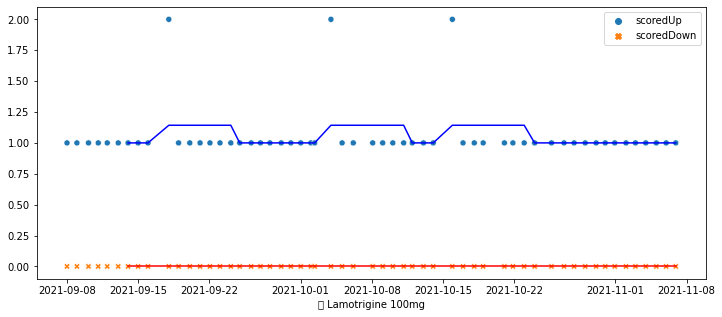

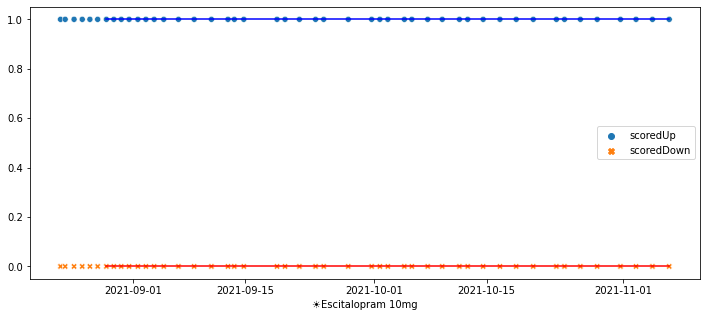

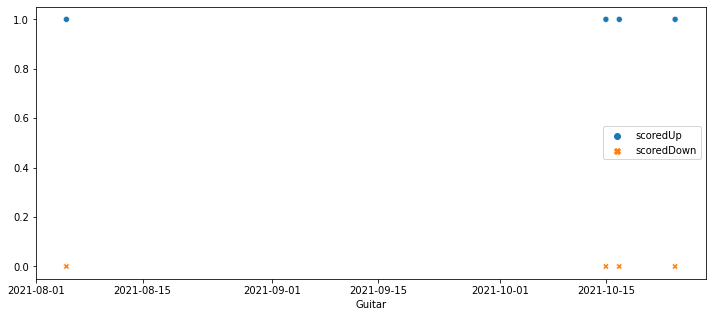

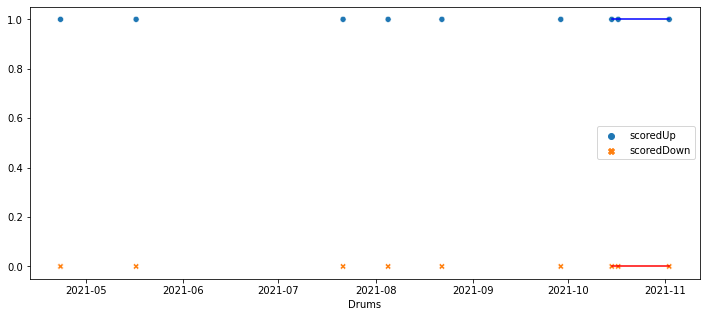

KeyError: 'date'

In [40]:
# habit_json = data['tasks']['habits'][0]
for habit_json in data['tasks']['habits']:
    habit_name = habit_json['text']
    print(f"### {}
    json_dict = habit_json['history']
    from datetime  import datetime 
    import pandas
    dataframe = pandas.json_normalize(json_dict)
    dataframe.index =  pandas.to_datetime(dataframe['date'], unit="ms")
    del dataframe['value']
    del dataframe['date']

    import seaborn
    import matplotlib.pyplot as plt

    # set figure size
    plt.figure( figsize = ( 12, 5))

    # plot a simple time series plot
    seaborn.scatterplot(
         data = dataframe,
    )

    plt.xlabel(habit_name)

    # computing a 7 day rolling average
    mean_win_size = 7
    dataframe[ f'up_{mean_win_size}d_avg' ] = dataframe['scoredUp'].rolling(mean_win_size).mean()
    dataframe[ f'down_{mean_win_size}d_avg' ] = dataframe['scoredDown'].rolling(mean_win_size).mean()
    # viewing the dataset
    # display(dataframe.head(10))
    plt.plot(dataframe[f'up_{mean_win_size}d_avg'], color='b')
    plt.plot(dataframe[f'down_{mean_win_size}d_avg'], color='r')
    plt.show()


In [3]:
display(
    dataframe
    # data['tasks']['habits'][0]['history']
)

,scoredUp,scoredDown
date,,
2019-11-11 00:05:09.384,1,1
2019-11-11 18:30:00.791,0,1
2019-11-13 01:41:22.765,0,1
2019-11-13 17:09:09.504,1,0
2019-11-17 03:30:21.861,1,0
2019-11-18 02:31:52.627,1,0
2019-11-21 21:42:56.425,0,1
2019-11-24 19:39:17.115,0,1
2019-11-28 12:10:51.632,0,1
